# The Math of Intelligence #1: Gradient descent

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

## Load dataset
### Cricket Chirps Vs. Temperature

* X = chirps/sec for the striped ground cricket
* Y = temperature in degrees Fahrenheit

**Reference:** _The Song of Insects by Dr.G.W. Pierce, Harvard College Press_

In [229]:
df = pd.read_csv("./input/crickets.csv")
df.columns = ["chirps/sec", "temp"]
df.head()

,chirps/sec,temp
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


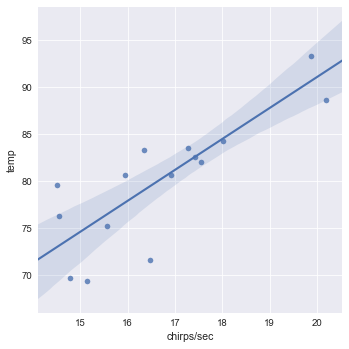

In [219]:
sns.lmplot(x="chirps/sec", y="temp", data=df, x_jitter=0.5)

In [222]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m 
    errors = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        err = compute_error_for_line_given_points(b, m, points)
        errors.append([i, err])
    return [b, m, errors]

In [224]:
points = df[["chirps/sec", "temp"]].as_matrix()

In [225]:
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 500
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
print("Running...")
[b, m, errors] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

Starting gradient descent at b = 0, m = 0, error = 6448.390660371871
Running...
After 500 iterations b = 0.3079494119469983, m = 4.773353584939434, error = 18.701209660853042


## Plot gradient descent result

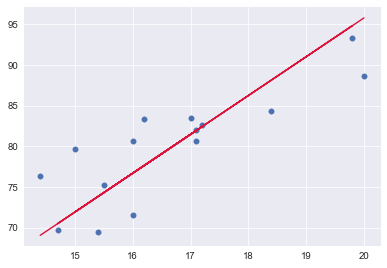

In [226]:
plt.scatter(df["chirps/sec"], df["temp"])

x = df["chirps/sec"]
y = m * x + b

plt.plot(x, y, color="crimson")

## Plot errors

In [227]:
errorsDf = pd.DataFrame(errors, columns=['iteration', 'error'])

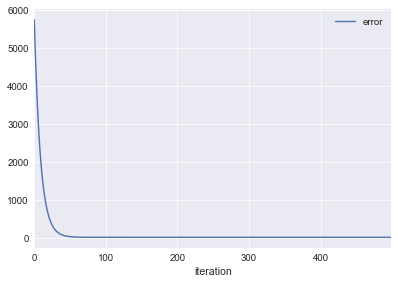

In [228]:
errorsDf.plot(x='iteration', y='error')